# Practicing PCA on a Face Dataset
In this exercise, we explore the application of the PCA on the LFW (Labeled Faces in the Wild) dataset which is available through the sklearn package.
# Submission
- There are four tasks for you.
- Report the results and answer the questions in the pdf file that you would submit along with your other solutions.
- Additionally, submit your code in the same Jupiter notebook format. (keep the overal format of the notebook unchanged)


# Packages
First of all, let's import the packages we need for this assignment.

In [1]:
# loading need libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd
from sklearn.datasets import fetch_lfw_people

# Dataset characteristics
Here we load the data set and take a look at the structure/properties of the dataset. This step is slow, but once the data set is loaded we do not need to repeat it.

In [2]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=1)
n_samples, image_height, image_width = lfw_people.images.shape

X = lfw_people.data
# the label to predict is the id of the person
Y = lfw_people.target
Y_names = lfw_people.target_names
n_classes = Y_names.shape[0]

print("Dataset properties:")
print("\t Number of data points: %d" % X.shape[0])
print("\t Number of features: %d" % X.shape[1])
print("\t Number of classes: %d" % n_classes)
print("\t Width of each image: %d" % image_width)
print("\t Height of each image: %d" % image_height)

Dataset properties:
	 Number of data points: 1288
	 Number of features: 11750
	 Number of classes: 7
	 Width of each image: 94
	 Height of each image: 125


# Showing the pictures

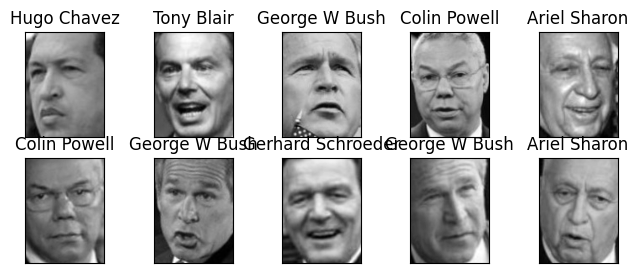

In [3]:
def plot_faces(images, labels, names, n_row, n_col):
    """Helper function to plot a gallery of portraits"""
    f = plt.figure(figsize=(8,3))
    for i in range(n_row * n_col):
        subfigure = f.add_subplot(n_row, n_col, i + 1)
        subfigure.imshow(images[i].reshape((image_height, image_width)), cmap=plt.cm.gray)
        subfigure.set_title(names[labels[i]])
        # Removing the axes
        plt.xticks(())
        plt.yticks(())
    plt.show()


plot_faces(X, Y, Y_names, 2, 5)

# Select "George W Bush" class
Run the below code to select a specific class of faces.

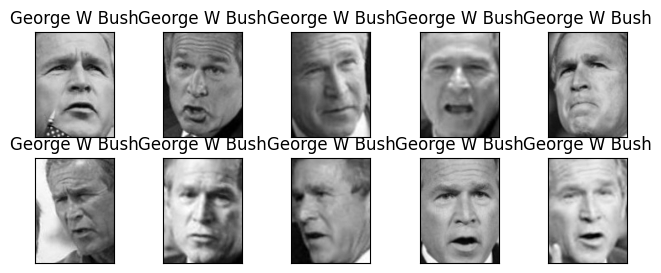

In [4]:
class_name_bush = 'George W Bush'
class_indx_bush = list(Y_names).index(class_name_bush)
X_bush = X[Y==class_indx_bush,:]
Y_bush = Y[Y==class_indx_bush]

plot_faces(X_bush, Y_bush, Y_names, 2, 5)

# <font color="red">Task 1: Eigenfaces (10 points) </font>

The below code is supposed to generate the "average faces" as well as the first "eigen faces" for George W Bush class. In this section you need to implement centeralize_data() and pca_components() functions.

We use SVD factorization in order to implement PCA. In the following link you can find useful information of how to do so. It explains the connection between PCA and SVD. https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca


You may check the video with link https://youtu.be/nbBvuuNVfco?si=SfJSE85fjMUMiboK for detailed explanation of SVD.

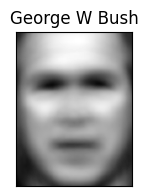

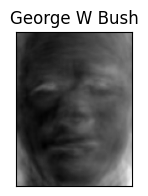

In [5]:
def centeralize_data(images):
    # Implement this function. Subtract the data mean from datapoints.
    # Return centeralized data and data mean
    # 5 points
    data_mean = np.mean(images, axis=0)
    c_data = images - data_mean
    return c_data , data_mean

def normalized_svd(images):
    # SVD is a matrix factorization which helps us to implement PCA.
    # Follow the given link above to understand how it works.
    # This function first ceteralizes the data points, and returns SVD factorization of the data set.
    XN, data_mean = centeralize_data(images)
    U,S,Vt = svd(XN)
    return U,S,Vt,data_mean

def pca_components(Vt, n_components):
    # Implement this function.
    # Return first n components (first n principal direction/axes)
    # 5 points
    components = Vt[:n_components, :]
    return components

def average_image_class(images):
    class_average = np.mean(images, axis = 0)
    return class_average

def eigen_face_class(images):
    _,_,Vt,_ = normalized_svd(images)
    return pca_components(Vt, n_components=1)

def plot_class_representatives(images, class_name, aggregator):
    f = plt.figure(figsize=(2,2))
    subfigure = f.add_subplot(1,1,1)
    class_representative = aggregator(images)

    subfigure.imshow(class_representative.reshape((image_height, image_width)), cmap=plt.cm.gray)
    subfigure.set_title(class_name)
    # Removing the axes
    plt.xticks(())
    plt.yticks(())
    plt.show()

plot_class_representatives(X_bush, class_name_bush, aggregator=average_image_class)
plot_class_representatives(X_bush, class_name_bush, aggregator=eigen_face_class)

# <font color="red">Task 2: PCA visualization (10 points) </font>
It is hard to visualize and get a sense of highdimensional data. One approach to address this problem is "dimensionality reduction". Here we project the data into the 2D plane to be able to "see" what is going on. Implement pca_transform() function.

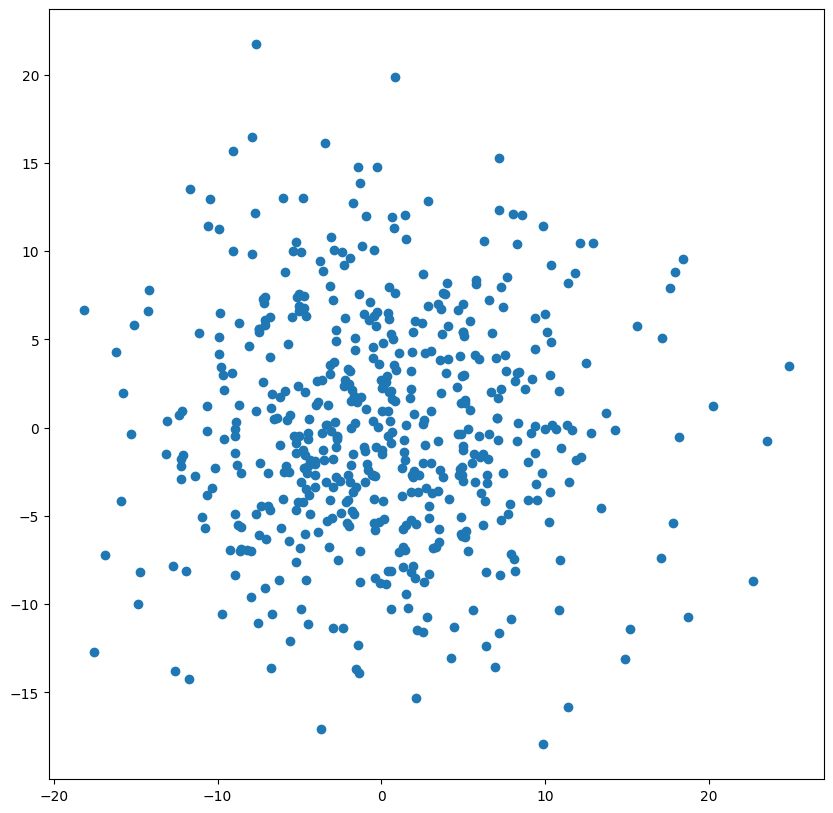

In [6]:
def pca_transform(U,S, n_components):
    # Implement this function.
    # Return transformed data using first n components.
    # Basically you have to return transformed 2D data
    # 10 points
    U_n = U[:, :n_components]
    S_n = np.diag(S[:n_components])

    transformed_data = np.dot(U_n, S_n)

    return transformed_data

U,S,Vt,data_mean = normalized_svd(X_bush)
T = pca_transform(U,S, n_components=2)
fig = plt.figure(figsize=(10,10))
plt.plot(T[:, 0], T[:, 1], 'o')

# <font color="red">Task 3: Reconstructing images (5 points)</font>
Some information is naturally lost when reducing the dimensionality of the data (just like the above scatter plot). In this part use the PCA (applied to the whole data set) to reduce the dimensionality of the data points to 2. Then, transform the 2D data points back to the original space to reconstruct the images. Implement pca_inverse_transform() function.

 - Plot the first 5 images in the data set and include it in your pdf report.

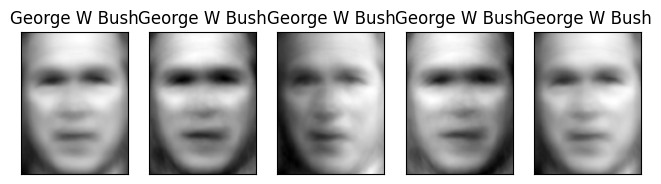

In [7]:
def pca_inverse_transform(transformed_data, components, data_mean):
    # Implement this function.
    # Return inverse transformed data.
    # Previously you derived transformed data (into lower dimension). Now you have to transformed it back into original space.
    # 5 points

    reconstructed_data = np.dot(transformed_data, components)

    reconstructed_data += data_mean

    return reconstructed_data

plot_faces(pca_inverse_transform(T, Vt[:2,:], data_mean),Y_bush, Y_names, 1, 5)

# <font color="red">Task 3: Average Reconstruction Error (30 points)</font>
Separate the image dataset into train (100 images) and test (rest of the data) datasets.
Train PCA with [2, 10, 30, 60, 100] components respectively. Reconstruction error is defined as $error=(\sum_{i=1}^n||x_i-reconstruct(pca(x_i))||^2_2)/n$, where $n$ is the number of images.

Plot average reconstruction error on training and testing data points with the following requirements:
  1. X-axis shows number of components.
  2. Y-axis shows reconstruction error.
  3. Draw two graphs, one for training and the other line for testing.

(20 points)

Explains the difference between the two graphs (10 points).

In [8]:
# Using the provided data, I'll take the first 100 images for training and the rest for testing.
X_train = X_bush[:100]
Y_train = Y_bush[:100]

X_test = X_bush[100:]
Y_test = Y_bush[100:]

# Return the shapes of the training and testing sets to confirm the split
X_train.shape, X_test.shape


((100, 11750), (430, 11750))

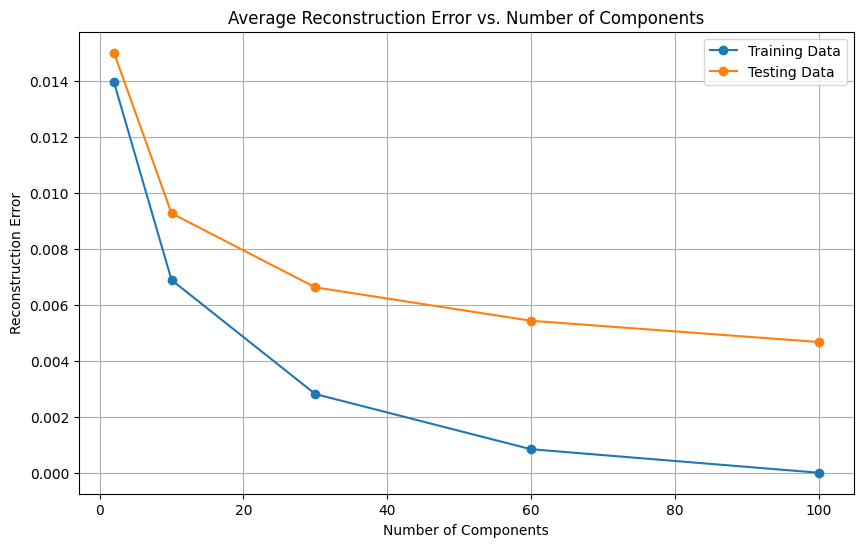

In [9]:
from sklearn.decomposition import PCA

# Define the number of components for PCA
components_list = [2, 10, 30, 60, 100]
train_errors = []
test_errors = []

# Train PCA and calculate reconstruction error for each number of components
for n_components in components_list:
    pca = PCA(n_components=n_components)

    # Fit PCA on training data
    pca.fit(X_train)

    # Transform and inverse transform training data
    X_train_pca = pca.transform(X_train)
    X_train_reconstructed = pca.inverse_transform(X_train_pca)

    # Transform and inverse transform testing data
    X_test_pca = pca.transform(X_test)
    X_test_reconstructed = pca.inverse_transform(X_test_pca)

    # Calculate reconstruction error for training data
    train_error = np.mean(np.square(X_train - X_train_reconstructed))
    train_errors.append(train_error)

    # Calculate reconstruction error for testing data
    test_error = np.mean(np.square(X_test - X_test_reconstructed))
    test_errors.append(test_error)

# Plotting the reconstruction errors
plt.figure(figsize=(10, 6))
plt.plot(components_list, train_errors, label='Training Data', marker='o')
plt.plot(components_list, test_errors, label='Testing Data', marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Reconstruction Error')
plt.title('Average Reconstruction Error vs. Number of Components')
plt.legend()
plt.grid(True)
plt.show()


I can observe that with the increase in components the reconstruction error decreases this is because it is able to capture more of the variance in the data, so that the reconstructed images are more like the originals.

The training datas reconstruction error is significantly lower than the test data reconstruction error, this can be caused by the genaralization to the new data and that the model has gain familiarity with the training data.

# <font color="red">Task 4: Kernel PCA (Bonus 10 points)</font>
Repeat the Task 2 but with 100 components and using RBF kernel PCA as KernelPCA(kernel='rbf', n_components=100, gamma=, fit_inverse_transform=True) (https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html).   
You don't have to implement KernelPCA yourself. Use sklearn KernelPCA.

Plot reconstruction error for train and test data in terms of gamma for gamma=[0.01, 0.05, 0.1, 0.5, 1].

(5 points)

Explain the difference. (5 points)

Hint: RBF kernel is like a Gaussian kernel. The role of the Gamma parameter is similar to the role of the inverse of the standard deviation (i.e., Gamma=1/sigma) of the Gaussian kernel. Here are some more details:

"Intuitively, the gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. The gamma parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors." https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html

In [10]:
from sklearn.decomposition import KernelPCA
X_train = X_bush[:100]
X_test = X_bush[100:]


In [13]:
def kernel_pca_reconstruction_error(data, gamma_value):
    kpca = KernelPCA(kernel='rbf', n_components=100, gamma=gamma_value, fit_inverse_transform=True)
    transformed_data = kpca.fit_transform(data)
    reconstructed_data = kpca.inverse_transform(transformed_data)
    error = np.mean(np.square(data - reconstructed_data))
    return error

gammas = [0.01, 0.05, 0.1, 0.5, 1]
train_errors = []
test_errors = []

for gamma_value in gammas:
    train_errors.append(kernel_pca_reconstruction_error(X_train, gamma_value))
    test_errors.append(kernel_pca_reconstruction_error(X_test, gamma_value))


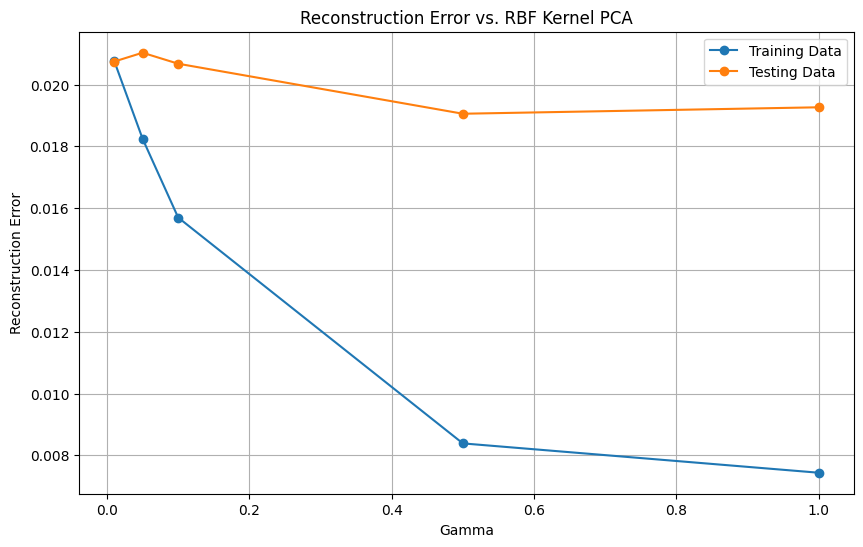

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(gammas, train_errors, label='Training Data', marker='o')
plt.plot(gammas, test_errors, label='Testing Data', marker='o')
plt.xlabel('Gamma')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Error vs. RBF Kernel PCA')
plt.legend()
plt.grid(True)
plt.show()


In the beginning the test errors start similarly this is because they do not catch the underlieing patterns in the data.

At the next point the test data seem to be an effect of some noise, but the train data is benefitting from the increase to be more flexible and catch more intricate patterns.

Both the models begins to level off as gamma increases, this is because the training data at is beginning to have catched most of the intricate patterns in the data. The test data seem to have a slight increase this is a result of overfitting, meaning the optimal value is gamma < 1. This could be the effect of high varience.

The overall behaviour of the grafs will significantly change to a more predicable graph when the number of components increase.
